In [1]:
#imports
from __future__ import print_function
import pyart
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from time import time
import os
from netCDF4 import num2date, date2num


In [2]:
fn  = 'h5/uq-xpol_sppi_20151210_163235.h5'
#Since the names in the HDF5 file are non-standard we use file_field_names = True
myradar = pyart.aux_io.read_odim_h5(fn, file_field_names=True) 

In [3]:
myradar.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (346,)>
elevation: <ndarray of type: float64 and shape: (346,)>
fields:
	PHIDP: <ndarray of type: float32 and shape: (346, 501)>
	WR2100_QC: <ndarray of type: float32 and shape: (346, 501)>
	VRADH: <ndarray of type: float32 and shape: (346, 501)>
	DBZH: <ndarray of type: float32 and shape: (346, 501)>
	ZDR: <ndarray of type: float32 and shape: (346, 501)>
	RATE: <ndarray of type: float32 and shape: (346, 501)>
	WRADH: <ndarray of type: float32 and shape: (346, 501)>
	RHOHV: <ndarray of type: float32 and shape: (346, 501)>
	KDP: <ndarray of type: float32 and shape: (346, 501)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 501
nrays: 346
radar_calibration: None
range: <ndarray of type: 

In [4]:
lat_lines = np.arange(-27.5,-28.5,-.1)
lon_lines = np.arange(152.5, 153.5, .1)
my_display = pyart.graph.RadarMapDisplay(myradar)
my_display.azimuths=np.linspace(120,270,346)

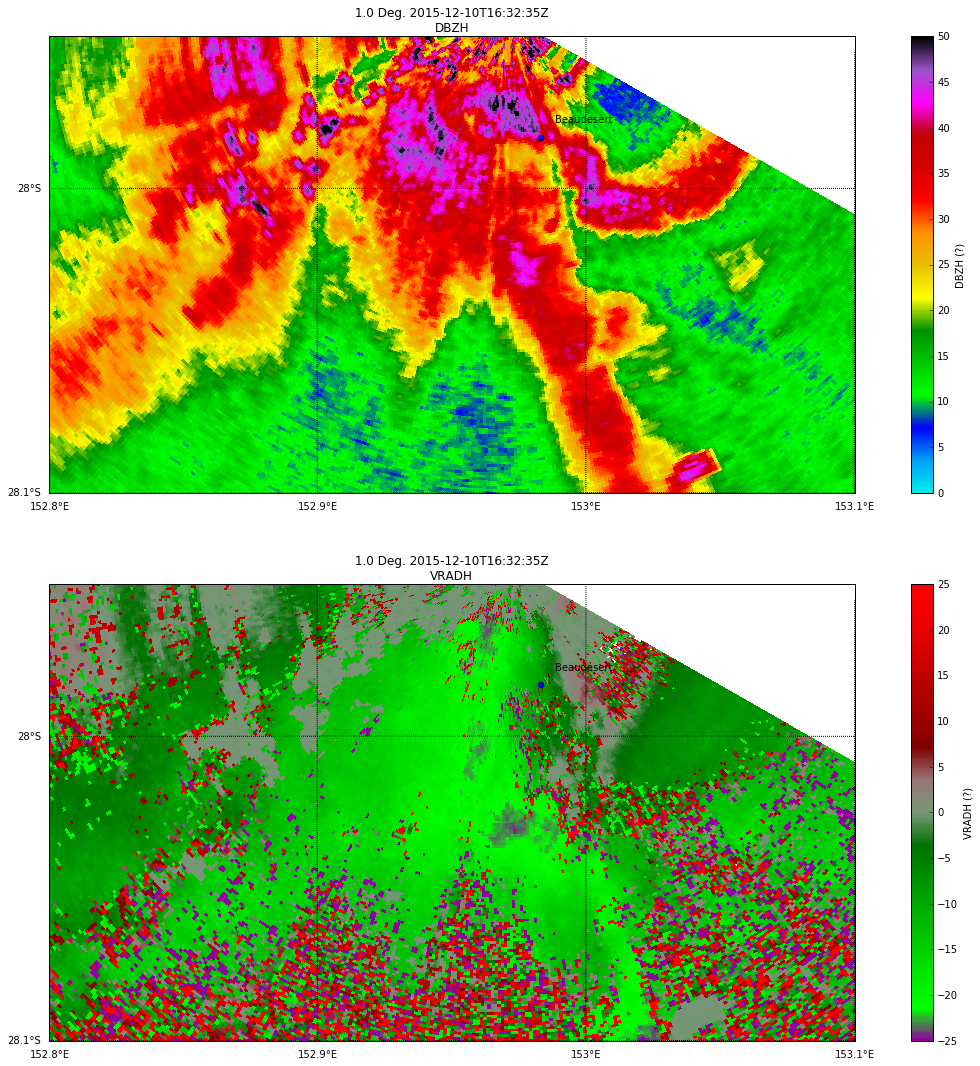

In [10]:
f = plt.figure(figsize=[20,18])
plt.subplot(2,1,1)
my_display.plot_ppi_map('DBZH', vmin=0, vmax=50, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -27.95, min_lat =-28.1, min_lon = 152.8, max_lon = 153.1,
                       cmap = pyart.graph.cm.NWSRef)
my_display.plot_point( 152.983333, -27.983333,
               label_text = 'Beaudesert', 
               label_offset=[.005,.005], symbol = 'bo' )
ax = plt.gca()
plt.subplot(2,1,2)
my_display.plot_ppi_map('VRADH', vmin=-25, vmax=25, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -27.95, min_lat =-28.1, min_lon = 152.8, max_lon = 153.1,
                       cmap = pyart.graph.cm.NWSVel)
my_display.plot_point( 152.983333, -27.983333,
               label_text = 'Beaudesert', 
               label_offset=[.005,.005], symbol = 'bo' )
ax = plt.gca()


In [11]:
dirr = 'h5/'
fls = os.listdir(dirr)
fls.sort()

In [ ]:

i = 0
for fl in fls:
    try:
        print('doing ', dirr+ fl)
        myradar = pyart.aux_io.read_odim_h5(dirr+ fl, file_field_names=True)
        
        lat_lines = np.arange(-27.5,-28.5,-.1)
        lon_lines = np.arange(152.5, 153.5, .1)
        my_display = pyart.graph.RadarMapDisplay(myradar)
        my_display.azimuths=np.linspace(120,270,346)
        
        f = plt.figure(figsize=[20,18])
        plt.subplot(2,1,1)
        my_display.plot_ppi_map('DBZH', vmin=0, vmax=50, 
                                lat_lines = lat_lines, lon_lines = lon_lines,
                                max_lat = -27.95, min_lat =-28.1, min_lon = 152.8, max_lon = 153.1,
                                cmap = pyart.graph.cm.NWSRef)
        
        my_display.plot_point( 152.983333, -27.983333,
               label_text = 'Beaudesert', 
               label_offset=[.005,.005], symbol = 'bo' )
        
        ax = plt.gca()
        plt.subplot(2,1,2)
        my_display.plot_ppi_map('VRADH', vmin=-25., vmax=25., 
                                lat_lines = lat_lines, lon_lines = lon_lines,
                                max_lat = -27.95, min_lat =-28.1, min_lon = 152.8, max_lon = 153.1,
                                cmap = pyart.graph.cm.NWSVel, colorbar_label = 'Radial Velocity (m/s)')
        
        my_display.plot_point( 152.983333, -27.983333,
               label_text = 'Beaudesert', 
               label_offset=[.005,.005], symbol = 'bo' )
        
        ax = plt.gca()
        plt.savefig('images/ftorn_%02d.png' %i, dpi=100)
        plt.close()
        i = i +1
    except:
        pass


doing  h5/.ipynb_checkpoints
doing  h5/uq-xpol_sppi_20151210_162453.h5
doing  h5/uq-xpol_sppi_20151210_162502.h5
doing  h5/uq-xpol_sppi_20151210_162511.h5
doing 